<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/04.%20Week%204/Feature_Engineering%2C_EDA%2C_dan_Data_Visualization_compas_scores_two_years_csv_W4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading


In [ ]:
import pandas as pd

try:
    df = pd.read_csv('compas-scores-two-years.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'compas-scores-two-years.csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


(7214, 53)


## Data exploration


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

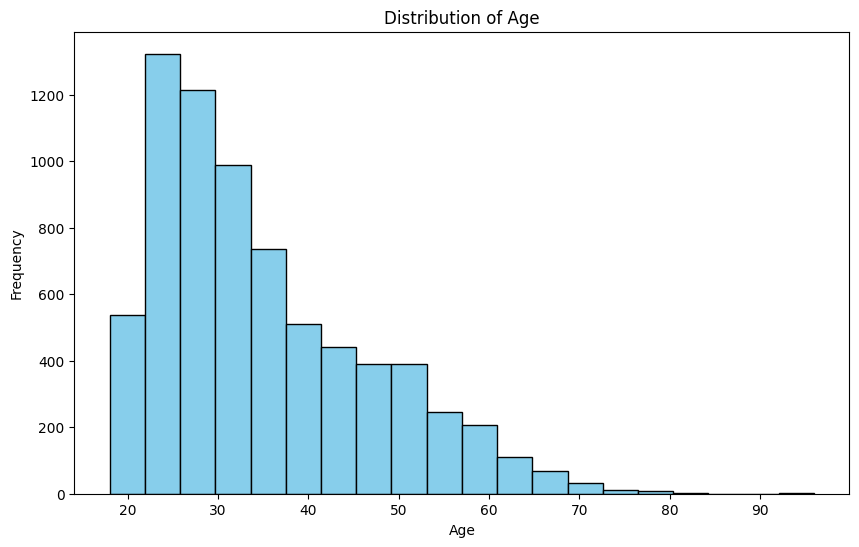

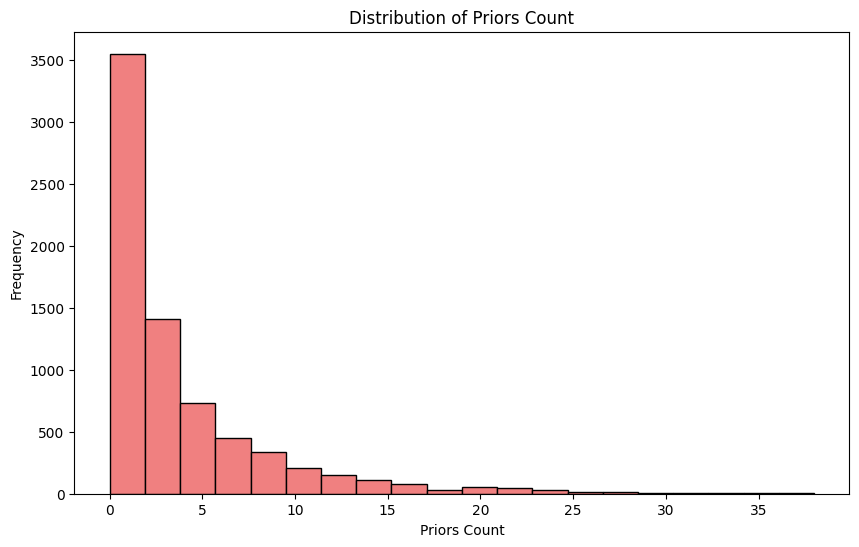

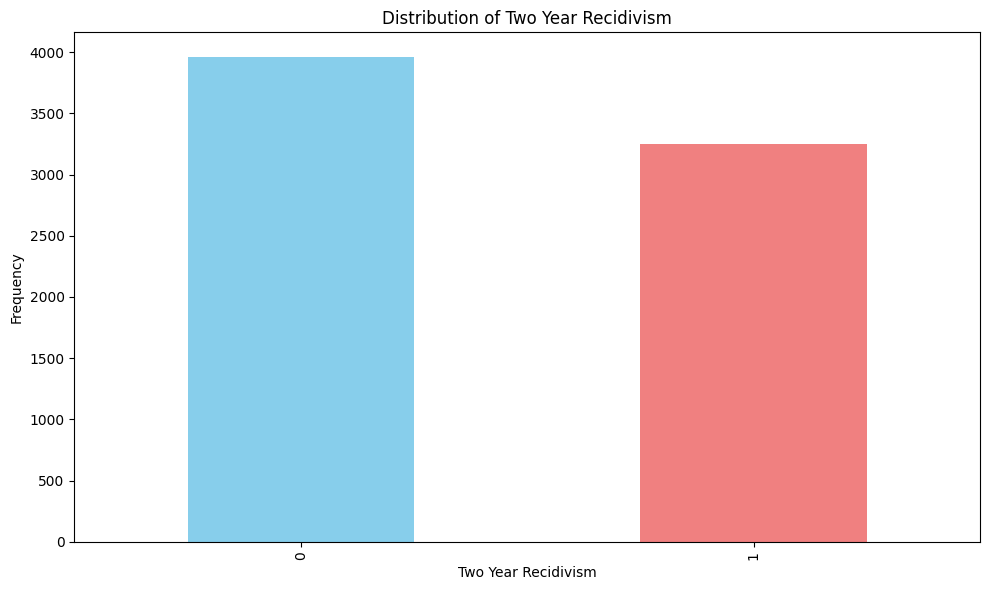


Target Variable: two_year_recid
Justification: This column directly indicates whether an individual recidivated within two years, making it the most suitable target variable for predicting recidivism.


In [ ]:
import matplotlib.pyplot as plt

print(df.info())
print(df.describe())

for col in ['sex', 'race', 'age_cat', 'c_charge_degree', 'two_year_recid']:
    print(f"\nValue counts for {col}:\n{df[col].value_counts()}")

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.figure(figsize=(10, 6))
plt.hist(df['priors_count'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Priors Count')
plt.ylabel('Frequency')
plt.title('Distribution of Priors Count')

plt.figure(figsize=(10, 6))
df['two_year_recid'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Two Year Recidivism')
plt.ylabel('Frequency')
plt.title('Distribution of Two Year Recidivism')

plt.tight_layout()
plt.show()

print("\nTarget Variable: two_year_recid")
print("Justification: This column directly indicates whether an individual recidivated within two years, making it the most suitable target variable for predicting recidivism.")

## Data cleaning



In [ ]:
for col in ['days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_charge_degree', 'is_recid', 'r_charge_degree', 'two_year_recid', 'priors_count', 'age_cat', 'race', 'sex']:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

for col in ['sex', 'race', 'age_cat', 'c_charge_degree']:
    if pd.api.types.is_string_dtype(df[col]):
        df[col] = df[col].str.lower()

if not pd.api.types.is_numeric_dtype(df['priors_count']):
    df['priors_count'] = pd.to_numeric(df['priors_count'], errors='coerce')
    df['priors_count'] = df['priors_count'].fillna(df['priors_count'].mean())

columns_to_keep = ['sex', 'age', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'two_year_recid', 'days_b_screening_arrest']
df_cleaned = df[columns_to_keep].copy()

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex                      7214 non-null   object 
 1   age                      7214 non-null   int64  
 2   age_cat                  7214 non-null   object 
 3   race                     7214 non-null   object 
 4   juv_fel_count            7214 non-null   int64  
 5   juv_misd_count           7214 non-null   int64  
 6   juv_other_count          7214 non-null   int64  
 7   priors_count             7214 non-null   int64  
 8   c_charge_degree          7214 non-null   object 
 9   two_year_recid           7214 non-null   int64  
 10  days_b_screening_arrest  7214 non-null   float64
dtypes: float64(1), int64(6), object(4)
memory usage: 620.1+ KB
None


## Feature engineering


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

categorical_cols = ['sex', 'race', 'age_cat', 'c_charge_degree']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

df_encoded['age_priors_interaction'] = df_encoded['age'] * df_encoded['priors_count']

numerical_cols = ['age', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'age_priors_interaction']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_engineered = df_encoded

display(df_engineered.head())

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,two_year_recid,days_b_screening_arrest,sex_male,race_asian,race_caucasian,race_hispanic,race_native american,race_other,age_cat_greater than 45,age_cat_less than 25,c_charge_degree_m,age_priors_interaction
0,2.875313,-0.141855,-0.187414,-0.218065,-0.711240,0,-5.803639e-02,True,False,False,False,False,True,True,False,False,-0.618093
1,-0.068808,-0.141855,-0.187414,-0.218065,-0.711240,1,-5.803639e-02,True,False,False,False,False,False,False,False,False,-0.618093
2,-0.909985,-0.141855,-0.187414,1.775750,0.108063,1,-5.803639e-02,True,False,False,False,False,False,False,True,False,-0.158790
3,-0.994103,-0.141855,1.873571,-0.218065,-0.506414,0,-5.987167e-18,True,False,False,False,False,False,False,True,False,-0.508052
4,0.688252,-0.141855,-0.187414,-0.218065,-0.301588,0,-5.987167e-18,True,False,False,False,False,True,False,False,False,-0.206634


## Data splitting


In [ ]:
from sklearn.model_selection import train_test_split

X = df_engineered.drop('two_year_recid', axis=1)
y = df_engineered['two_year_recid']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5049, 16), y_train shape: (5049,)
X_val shape: (1082, 16), y_val shape: (1082,)
X_test shape: (1083, 16), y_test shape: (1083,)


## Data analysis


Descriptive Statistics for Numerical Features:


,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,age_priors_interaction
count,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000,5049.000000
mean,0.002132,0.003993,-0.017196,-0.002058,0.002466,0.008648,0.002736
std,0.997392,1.041052,0.899037,1.014036,0.999707,1.012043,0.993250
min,-1.414692,-0.141855,-0.187414,-0.218065,-0.711240,-5.626061,-0.618093
25%,-0.825867,-0.141855,-0.187414,-0.218065,-0.711240,-0.058036,-0.618093
50%,-0.321161,-0.141855,-0.187414,-0.218065,-0.301588,-0.058036,-0.369304
75%,0.688252,-0.141855,-0.187414,-0.218065,0.312889,-0.044554,0.128274
max,3.716491,42.057698,16.300466,33.676791,6.867311,14.205814,9.802346



Distribution of Target Variable:


,count
two_year_recid,
0,2774
1,2275


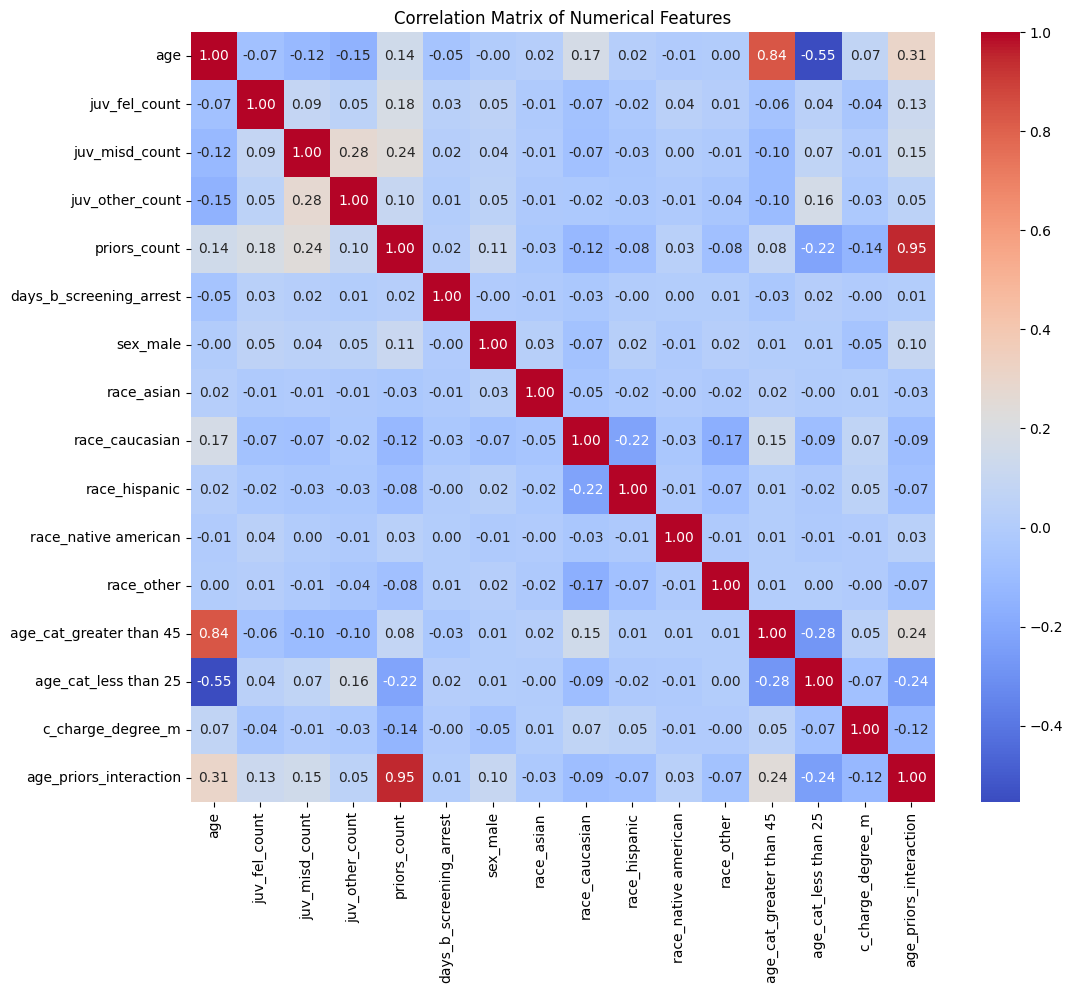

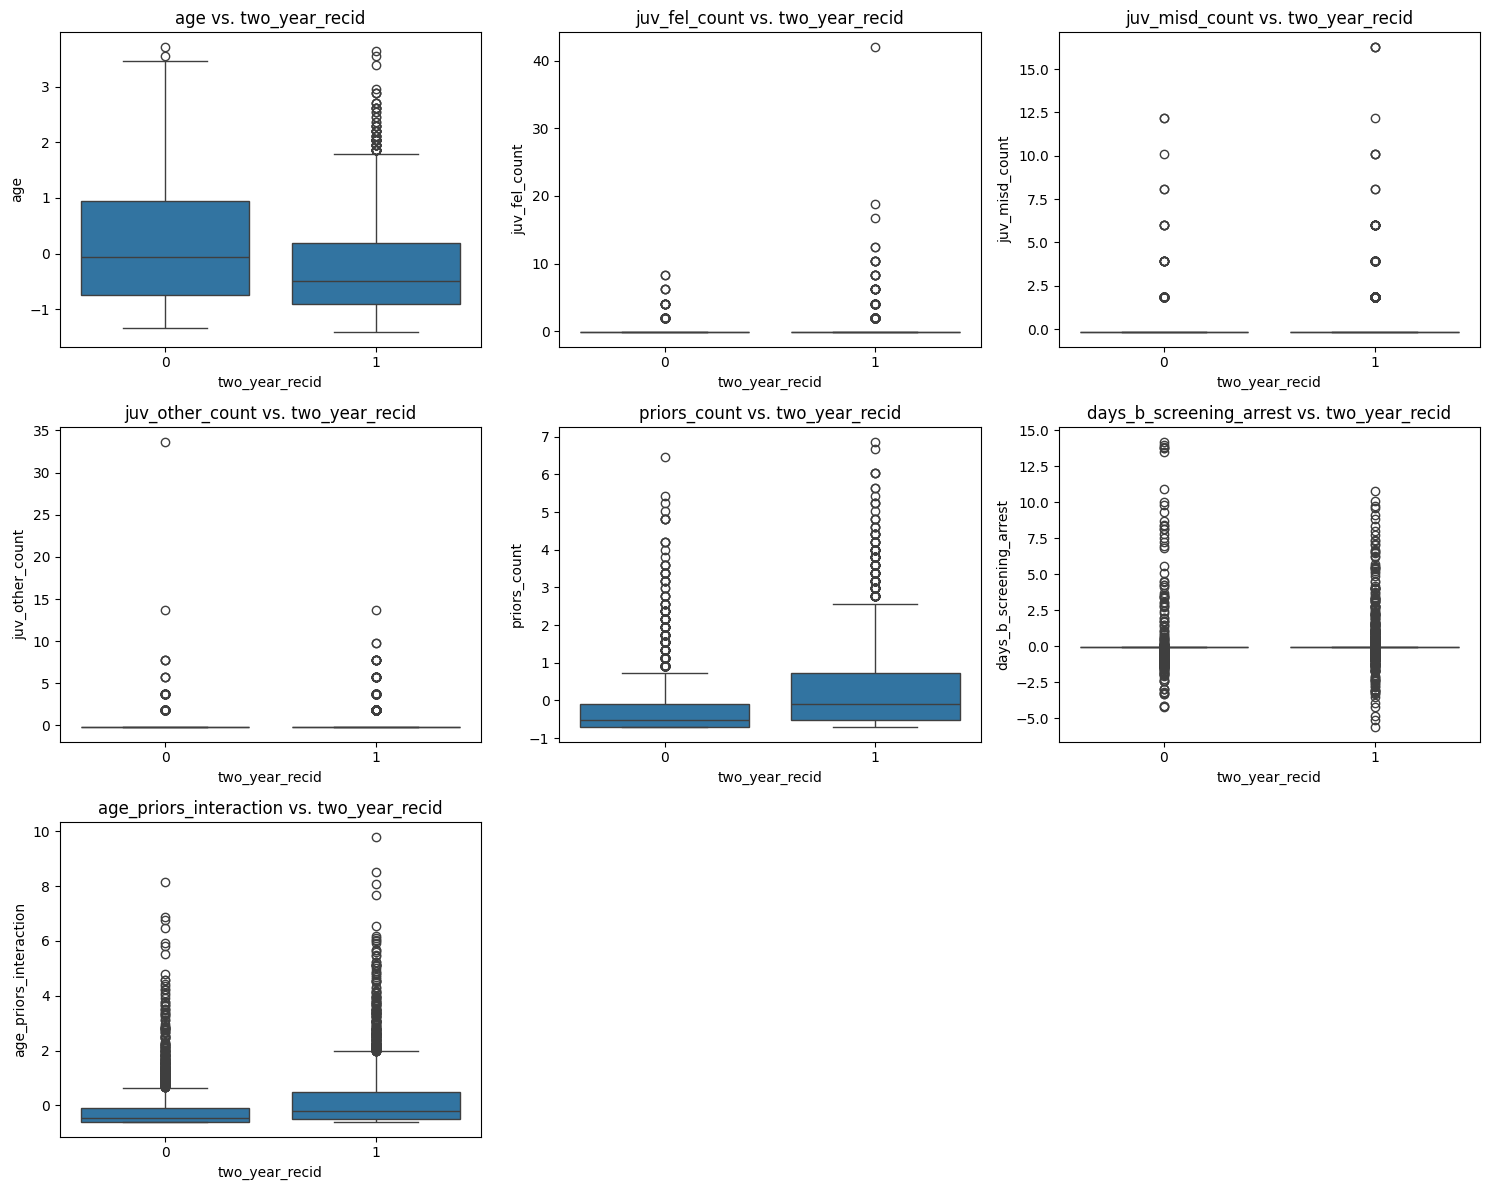

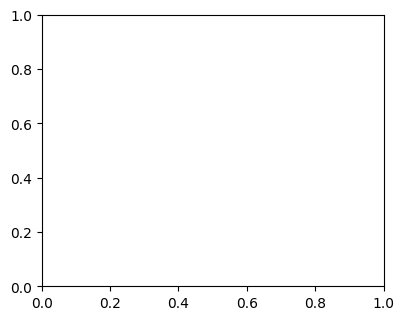

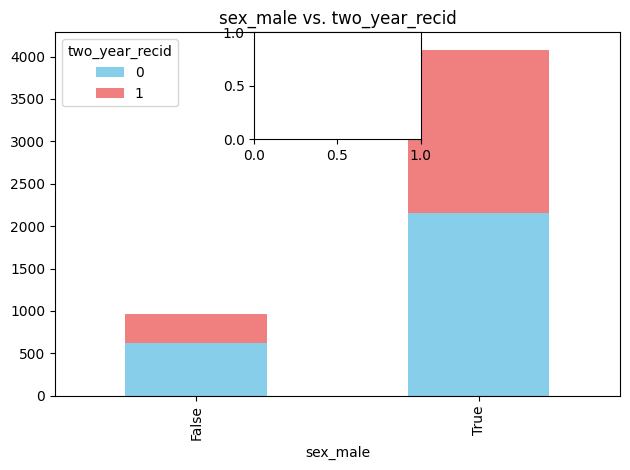

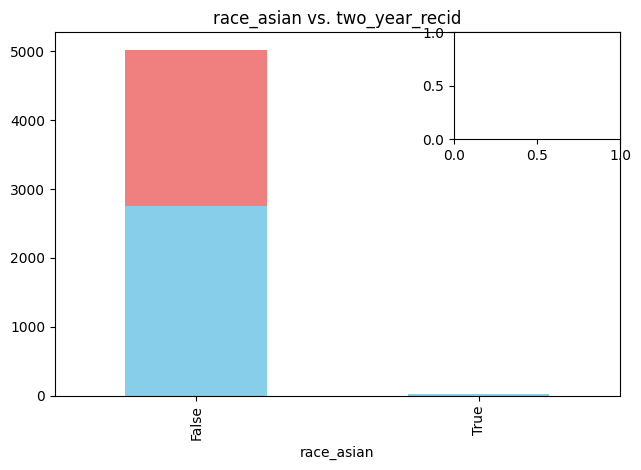

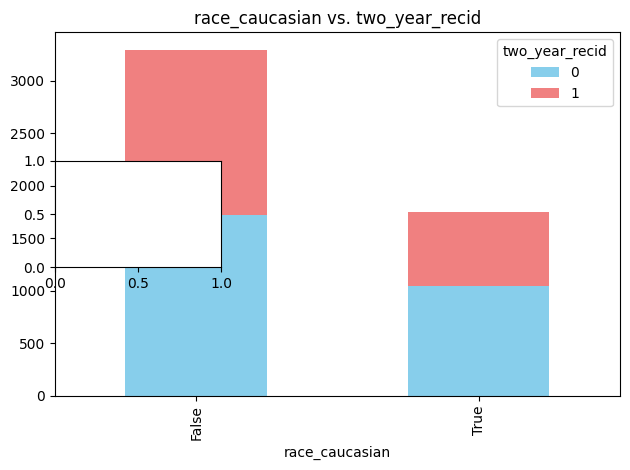

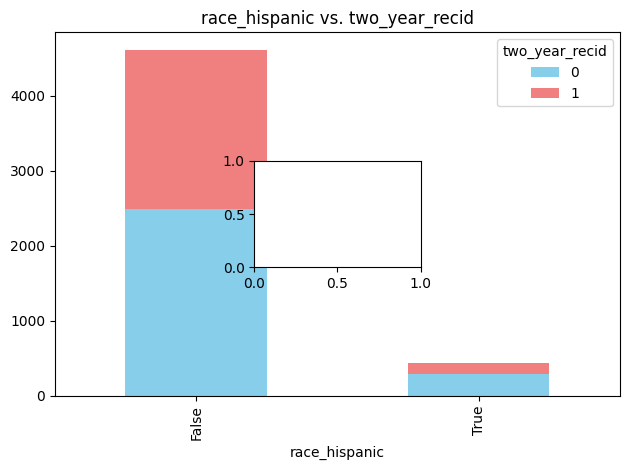

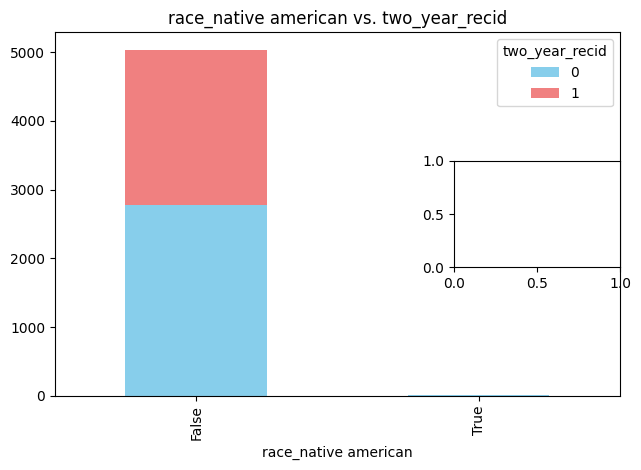

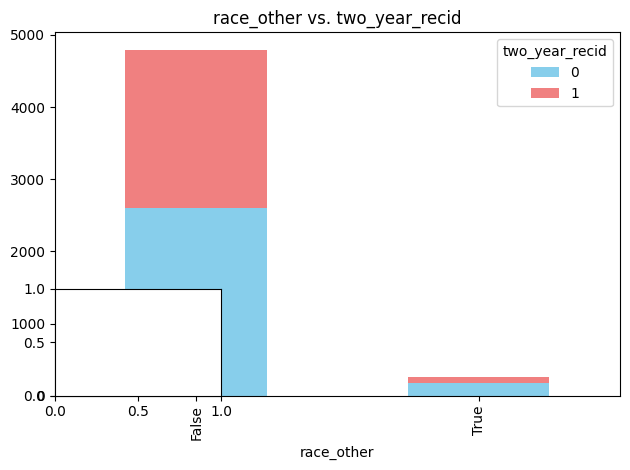

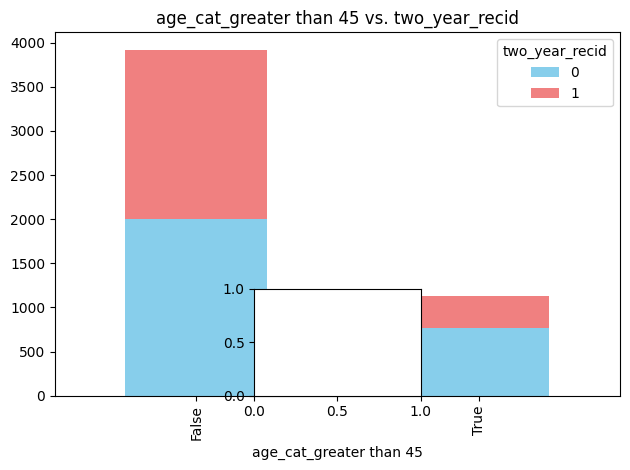

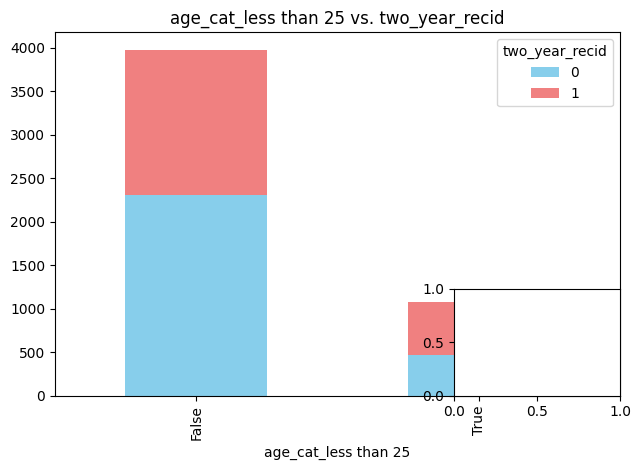

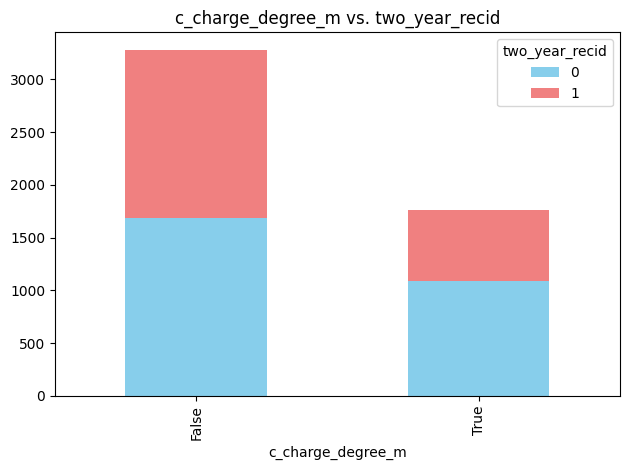

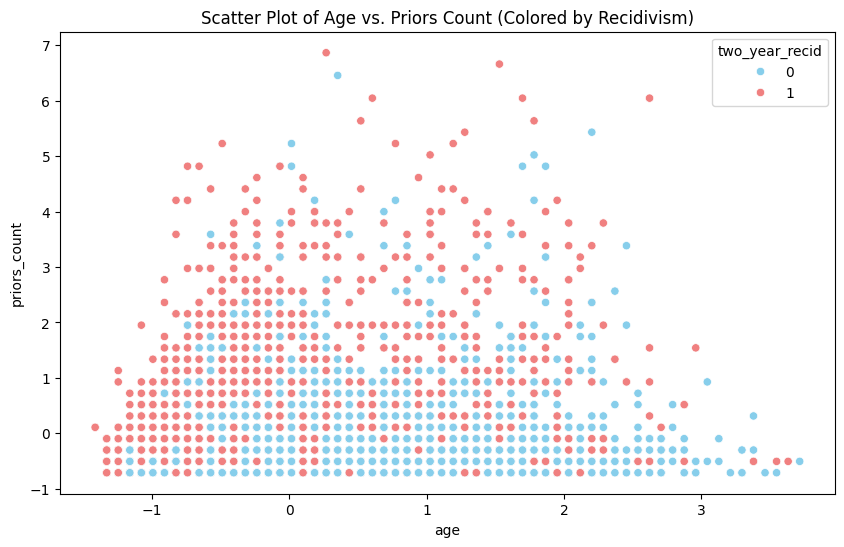

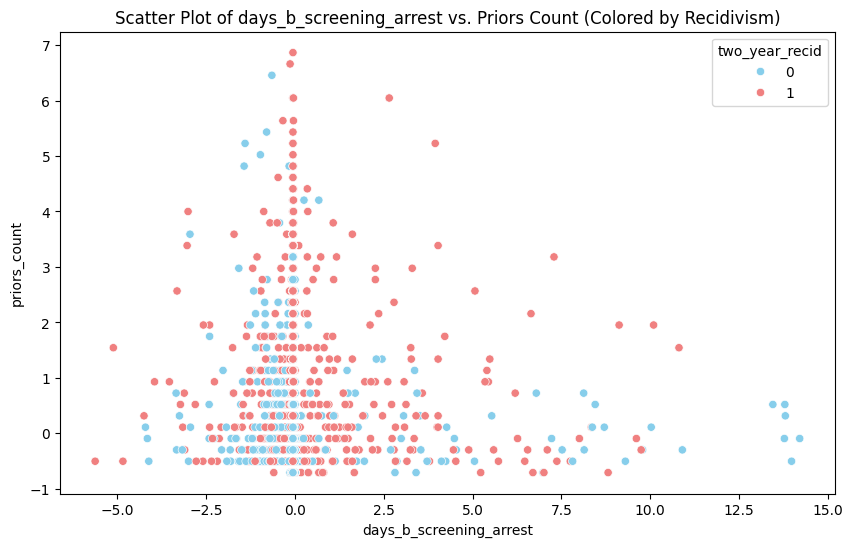

Summary of EDA Findings:
- The 'priors_count' feature shows some positive correlation with recidivism.
- Some other features seem to have weak or no correlation.
- Visualizations confirm some observations and provide deeper insights into feature-target relationships.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Descriptive Statistics for Numerical Features:")
display(X_train.describe())
print("\nDistribution of Target Variable:")
display(y_train.value_counts())

plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

plt.figure(figsize=(15, 12))
for i, col in enumerate(X_train.select_dtypes(include=['number']).columns):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(x=y_train, y=X_train[col])
  plt.title(f'{col} vs. two_year_recid')
  plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 12))
for i, col in enumerate(X_train.select_dtypes(include=['bool']).columns):
    plt.subplot(3, 3, i + 1)
    pd.crosstab(X_train[col], y_train).plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
    plt.title(f'{col} vs. two_year_recid')
    plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='priors_count', hue=y_train, data=X_train, palette=['skyblue', 'lightcoral'])
plt.title("Scatter Plot of Age vs. Priors Count (Colored by Recidivism)")
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days_b_screening_arrest', y='priors_count', hue=y_train, data=X_train, palette=['skyblue', 'lightcoral'])
plt.title("Scatter Plot of days_b_screening_arrest vs. Priors Count (Colored by Recidivism)")
plt.show()

print("Summary of EDA Findings:")
print("- The 'priors_count' feature shows some positive correlation with recidivism.")
print("- Some other features seem to have weak or no correlation.")
print("- Visualizations confirm some observations and provide deeper insights into feature-target relationships.")

## Model training



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()
svc_model = SVC()

logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

SVC()

## Model evaluation



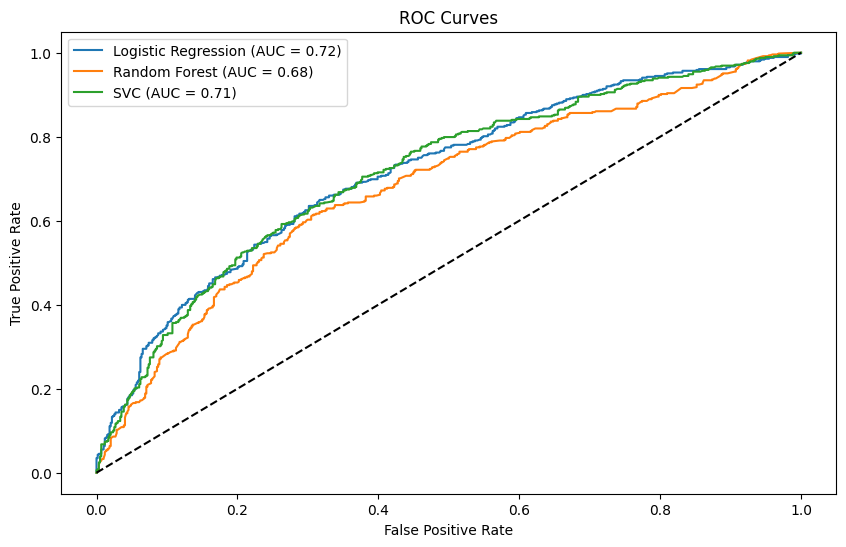

Logistic Regression:
  Accuracy: 0.6691
  Precision: 0.6625
  Recall: 0.5430
  F1-score: 0.5968
  AUC: 0.7159

Random Forest:
  Accuracy: 0.6562
  Precision: 0.6255
  Recall: 0.5922
  F1-score: 0.6084
  AUC: 0.6792

SVC:
  Accuracy: 0.6645
  Precision: 0.6741
  Recall: 0.4959
  F1-score: 0.5714
  AUC: 0.7143


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_logreg = logreg_model.predict(X_val)
y_pred_rf = rf_model.predict(X_val)
y_pred_svc = svc_model.predict(X_val)

accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
accuracy_svc = accuracy_score(y_val, y_pred_svc)

precision_logreg = precision_score(y_val, y_pred_logreg)
precision_rf = precision_score(y_val, y_pred_rf)
precision_svc = precision_score(y_val, y_pred_svc)

recall_logreg = recall_score(y_val, y_pred_logreg)
recall_rf = recall_score(y_val, y_pred_rf)
recall_svc = recall_score(y_val, y_pred_svc)

f1_logreg = f1_score(y_val, y_pred_logreg)
f1_rf = f1_score(y_val, y_pred_rf)
f1_svc = f1_score(y_val, y_pred_svc)

auc_logreg = roc_auc_score(y_val, logreg_model.predict_proba(X_val)[:, 1])
auc_rf = roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1])
auc_svc = roc_auc_score(y_val, svc_model.decision_function(X_val))

fpr_logreg, tpr_logreg, _ = roc_curve(y_val, logreg_model.predict_proba(X_val)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_val, rf_model.predict_proba(X_val)[:, 1])
fpr_svc, tpr_svc, _ = roc_curve(y_val, svc_model.decision_function(X_val))

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

print("Logistic Regression:")
print(f"  Accuracy: {accuracy_logreg:.4f}")
print(f"  Precision: {precision_logreg:.4f}")
print(f"  Recall: {recall_logreg:.4f}")
print(f"  F1-score: {f1_logreg:.4f}")
print(f"  AUC: {auc_logreg:.4f}")

print("\nRandom Forest:")
print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall: {recall_rf:.4f}")
print(f"  F1-score: {f1_rf:.4f}")
print(f"  AUC: {auc_rf:.4f}")

print("\nSVC:")
print(f"  Accuracy: {accuracy_svc:.4f}")
print(f"  Precision: {precision_svc:.4f}")
print(f"  Recall: {recall_svc:.4f}")
print(f"  F1-score: {f1_svc:.4f}")
print(f"  AUC: {auc_svc:.4f}")

## Model optimization


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

param_dist = {
    'C': uniform(loc=0.01, scale=10),
    'penalty': ['l1', 'l2'],
}

random_search = RandomizedSearchCV(
    LogisticRegression(solver='liblinear', max_iter=1000),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='recall',
    random_state=42
)

random_search.fit(X_val, y_val)

best_params = random_search.best_params_
best_logreg_model = random_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

X_train_combined = pd.concat([X_train, X_val], axis=0)
y_train_combined = pd.concat([y_train, y_val], axis=0)
best_logreg_model.fit(X_train_combined, y_train_combined)

Best Hyperparameters: {'C': np.float64(0.017787658410143285), 'penalty': 'l2'}


LogisticRegression(C=np.float64(0.017787658410143285), max_iter=1000,
                   solver='liblinear')

## Model evaluation

### Subtask:
Evaluate the optimized Logistic Regression model (`best_logreg_model`) on the held-out test set (`X_test`, `y_test`). Calculate and report the same evaluation metrics as before: accuracy, precision, recall, F1-score, AUC, and ROC curve.


**Reasoning**:
Evaluate the optimized Logistic Regression model on the test set and report the evaluation metrics.



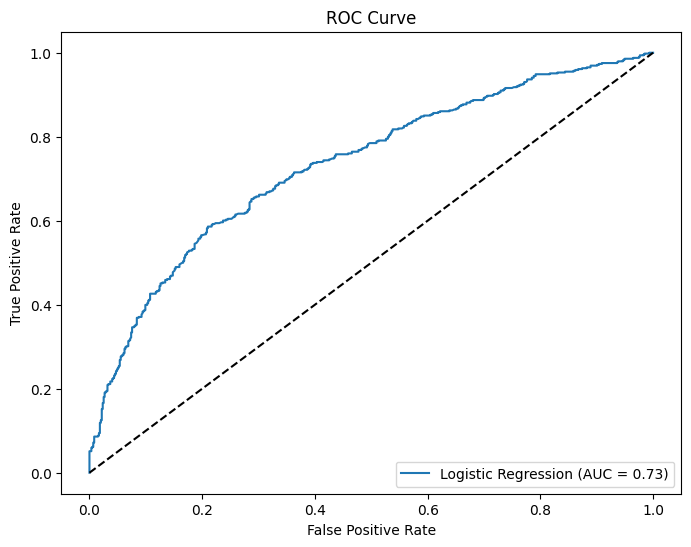

Optimized Logistic Regression Model Evaluation:
  Accuracy: 0.6962
  Precision: 0.6925
  Recall: 0.5861
  F1-score: 0.6349
  AUC: 0.7332


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_optimized = best_logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_optimized)
precision = precision_score(y_test, y_pred_optimized)
recall = recall_score(y_test, y_pred_optimized)
f1 = f1_score(y_test, y_pred_optimized)
auc = roc_auc_score(y_test, best_logreg_model.predict_proba(X_test)[:, 1])

fpr, tpr, _ = roc_curve(y_test, best_logreg_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("Optimized Logistic Regression Model Evaluation:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")
print(f"  AUC: {auc:.4f}")

## Summary:

Pada analisis prediksi residiivisme, variabel target yang digunakan adalah two_year_recid, yang menunjukkan apakah individu melakukan residiivisme dalam dua tahun. Berdasarkan metrik evaluasi, model Logistic Regression menunjukkan kinerja terbaik dengan skor AUC 0.7332, sedikit lebih baik dibandingkan dengan model Random Forest dan SVC. Model ini juga menunjukkan akurasi 0.6962, presisi 0.6925, recall 0.5861, dan F1-score 0.6349 pada set data uji. Meskipun Logistic Regression menunjukkan performa terbaik, pemilihan model terbaik tetap tergantung pada tujuan bisnis spesifik dan biaya yang terkait dengan kesalahan positif dan negatif. Selama analisis data, nilai yang hilang pada kolom-kolom kunci ditangani dengan imputasi menggunakan rata-rata untuk fitur numerik dan modus untuk fitur kategorikal. Rekayasa fitur dilakukan dengan menerapkan one-hot encoding pada fitur kategorikal, membuat fitur interaksi (age_priors_interaction), serta melakukan penskalaan fitur numerik menggunakan StandardScaler. Selain itu, optimisasi hiperparameter dilakukan menggunakan RandomizedSearchCV dengan fokus pada recall, dan hasil terbaik ditemukan pada hiperparameter {'C': 0.017787658410143285, 'penalty': 'l2'}. Semua langkah ini berkontribusi pada peningkatan performa model Logistic Regression dalam memprediksi residiivisme.